In [33]:
import numpy as np 
import sklearn as sk
import pandas as pd
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.datasets import load_wine
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier



from sklearn import tree
from sklearn.tree import export_text
import pandas as pd
import graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


# Fonction d'analyse des arbres generes

 Parcourir arbre va permetre de trouver les feuilles de la classes opposées pour ensuite appeler generercontrefactuel qui va remonter le chemin de l'arbre jusqu'a la racine pour comprendre quel est le chemin prit pour generer un contrefactuel de l'exemple choisit
 
 Analysetree va plot l'arbre et effectuer l'explication de la classification sur le point mis en input 

In [34]:
def parcourirarbre(arbre,y):
    if y==0: # on mets la classe opposé
        classe=1
    else:
        classe=0
    print("\n generation des regles contrefactuel")
    n_nodes = arbre.tree_.node_count
    children_left = arbre.tree_.children_left
    children_right = arbre.tree_.children_right
    feature = arbre.tree_.feature
    threshold = arbre.tree_.threshold
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)

    stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
    while len(stack) > 0: # on recupere la liste des feuilles que l'on mets dans une liste de boolean
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

    
        is_split_node = children_left[node_id] != children_right[node_id]

        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True
    for i in range(n_nodes):# on parcours les noeuds
        if is_leaves[i]:# on check si c'est une feuille
            a=np.argsort(arbre.tree_.value[i])[-1][-1] # on calcul la classe de la feuille
            if a!=y:# si c'est une classe differente de celle de notre point on genere
                generercontrefactuel(arbre,i,classe)# on retrace son chemin jusqu'a la racine et on l'affiche
      
    

In [35]:
def generercontrefactuel(arbre,y,classe):
    print(" \ncas pour la feuille numero ",y)
    n_nodes = arbre.tree_.node_count
    children_left = arbre.tree_.children_left
    children_right = arbre.tree_.children_right
    feature = arbre.tree_.feature
    threshold = arbre.tree_.threshold
    chemin=[y]
    sample_id = classe

    while(chemin[-1]!=0):# tant qu'on est pas remonte a la racine
        for i in range(n_nodes): # on parcour les noeuds
            if children_left[i]==chemin[-1] or children_right[i]==chemin[-1]:# si un des enfants est le dernier element de chemin on a trouve le pere
                chemin.append(i)# on ajoiute le paire
    for node_id in range(len(chemin)):# on parcours le chemin fait
    

    # on print le noeud en partant de la racine pour generer l'exemple
        if X_test[sample_id, feature[chemin[-1-node_id]]] <= threshold[chemin[-1-node_id]]:# on recupere les features
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print(" noeud  {node} : (X_test[{sample}, {feature}] = {value}) "# on print le noeud avec la regle de decision
            "{inequality} {threshold})".format(
                node=node_id,
                sample=sample_id,
                feature=feature[chemin[-1-node_id]],
                value=X_test[sample_id, feature[chemin[-1-node_id]]],
                inequality=threshold_sign,
                threshold=threshold[chemin[-1-node_id]],
            )
        )
        plt.show()
    

In [36]:
def analysetree(model,X_test,features_name):
    plt.figure(figsize=(15,15))
    tree.plot_tree(arbre,class_names=["0","1"],feature_names=features_name)
    plt.show()
    node_indicator = arbre.decision_path(X_test)
    leaf_id = arbre.apply(X_test)
    n_nodes = arbre.tree_.node_count
    children_left = arbre.tree_.children_left
    children_right = arbre.tree_.children_right
    feature = arbre.tree_.feature
    threshold = arbre.tree_.threshold
    sample_id = 0
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
  


    node_index = node_indicator.indices[node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]]

    print("Regle utilisé pour classer l'exemple dans la classe {id}:\n".format(id=sample_id))
    for node_id in node_index:
    # continue to the next node if it is a leaf node
        if leaf_id[sample_id] == node_id:
            continue

    # check if value of the split feature for sample 0 is below threshold
        if X_test[sample_id, feature[node_id]] <= threshold[node_id]:
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print("noeud  {node} : (X_test[{sample}, {feature}] = {value}) "
            "{inequality} {threshold})".format(
                node=node_id,
                sample=sample_id,
                feature=feature[node_id],
                value=X_test[sample_id, feature[node_id]],
                inequality=threshold_sign,
                threshold=threshold[node_id],
            )
        )
        plt.show()

# generation des données ( ex1)

In [37]:
def données(noises):# créer les données
    random.seed(10)
    return make_moons(n_samples=1000,noise=noises)

def train_test(x,y):# split le dataset en train et test 
    v=int(len(x)*0.7)
    trainx,testx=x[:v,:], x[v:,:]
    trainy,testy=y[:v], y[v:]
    return trainx,testx,trainy,testy
    

In [38]:
def plot(x,y):# plot les données en fonction des classes
    for n in range(len(x)):
        if y[n]==0:
            plt.scatter(x[n][0],x[n][1],c='blue')
        else:
            plt.scatter(x[n][0],x[n][1],c='red')
    plt.show()

In [39]:
x,y=données(0.2)



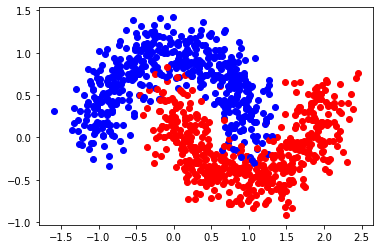

In [40]:
plot(x,y)

In [41]:
X_train, X_test, y_train, y_test =train_test_split(x,y, test_size=0.25, random_state=1)


indice + 146
point =  [ 1.51949369 -0.2045814 ]
classe = 1


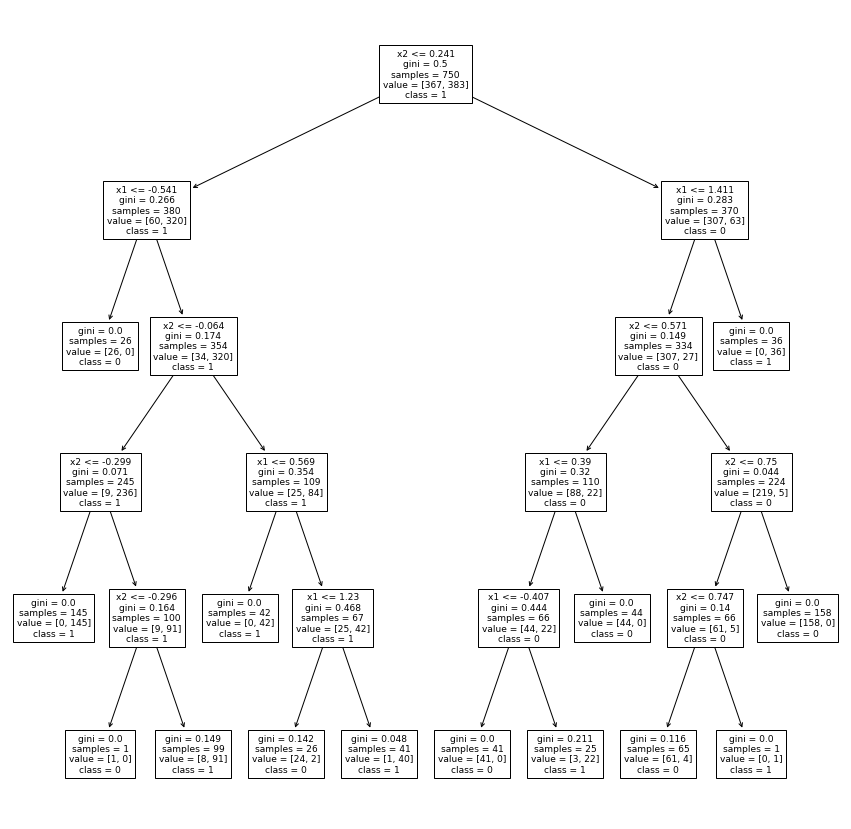

Regle utilisé pour classer l'exemple dans la classe 0:

noeud  0 : (X_test[0, 1] = -0.20458139979296425) <= 0.24131491035223007)
noeud  1 : (X_test[0, 0] = 1.5194936912223624) > -0.540639266371727)
noeud  3 : (X_test[0, 1] = -0.20458139979296425) <= -0.06393454223871231)
noeud  4 : (X_test[0, 1] = -0.20458139979296425) > -0.2989184707403183)
noeud  6 : (X_test[0, 1] = -0.20458139979296425) > -0.29639969766139984)

 generation des regles contrefactuel
 
cas pour la feuille numero  2
 noeud  0 : (X_test[0, 1] = 0.5721019194944302) > 0.24131491035223007)
 noeud  1 : (X_test[0, 0] = -1.298994177009079) <= -0.540639266371727)
 noeud  2 : (X_test[0, -2] = -1.298994177009079) > -2.0)
 
cas pour la feuille numero  7
 noeud  0 : (X_test[0, 1] = 0.5721019194944302) > 0.24131491035223007)
 noeud  1 : (X_test[0, 0] = -1.298994177009079) <= -0.540639266371727)
 noeud  2 : (X_test[0, 1] = 0.5721019194944302) > -0.06393454223871231)
 noeud  3 : (X_test[0, 1] = 0.5721019194944302) > -0.298918470740318

In [42]:
arbre = tree.DecisionTreeClassifier(max_depth=5)
arbre = arbre.fit(X_train, y_train)
indice=random.randint(0, len(X_test))
print("indice +",indice)
print( "point = ",X_test[indice])
print("classe =", y_test[indice])
analysetree(arbre,X_test[indice].reshape(1,-1),["x1","x2"])
parcourirarbre(arbre,y_test[indice])





# Implementation de LORE Exercice 2

geneticneightv2 va generer l'ensemble de donnée sur l'algorithme genetique en faisant appel au fonction select, crossover , calcul_fitness et mutate. Elle va generer et retourner un ensemble de donnée ainsi que la classes de chacun des elements. Elle prend me points, sa classe, le jeu de test, les probabilité , le nombre de dimension et le nombre de str et la pop finale à generer et le nombre de tour de boucle dans chacun des cas 

crossover va generer les nouveaux exemples et faire les crossover avec une probabilite mis en parametre.
 
Mutate va juste calculer les probablités et appliquer les mutations en prenant la distribution des attributs dans l'ensemble de données test. 

calcul_fitness va calculer les distances en fonctions de la classe mis en entrée et renvoyer un tableau avec les valeurs de la fitness. Elle appel Imemclasse Idiffclasse I et distance. Les I sont les 3 de la formules du coups et distance calcul attribut par attribut en verifiant le type ( str ou autre)

Select va selectionner les individus avec la meilleure fitness mais en essayant de priorisé ceux de la même classe et de limiter les doublons ( nous avons fait cela car pour le probleme avec les données réels, la plupart des cas ne generait aucun exemple de la classe opposé. Faire cela m'a permis de reduire ce nombre de cas). 

Lore va appeler la fonction geneticneightv2 et entrainer l'arbre avec le jeu de données generer.





In [12]:
def Randomforest(trainx,trainy,testx,testy):# chaque fonction créer un classifieur, l'entraine le test et le renvoit avec le resultat
    clf = RandomForestClassifier()
    clf.fit(trainx, trainy)
    a=clf.predict(testx)
    return a , clf

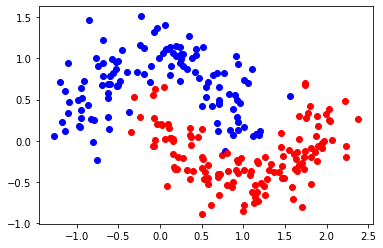

In [13]:

a, RF=Randomforest(X_train, y_train,X_test, y_test)
plot(X_test,a)



In [14]:
def geneticneightv2(x,y,model,N,G,pc,pm,h,d,X_test):
    if y==0:# on recupere la classe opposé(pour les select)
        classe=1
    else:
        classe=0
    dimension=len(x)# on recupere le nombre d'attribu
    nbgenere=N # on genera N element à chaque tour de boucle
    popplus=[]# population avec la même classe 
    popplus=crossover(x,pc,N,dimension)# on commence à sampler à partir de x et premeir crossover
    popplus=mutate(popplus,pm,dimension,X_test)# premiere mutation
    #print(pop)
    Yp=model.predict(popplus)# on recupere le Y des points genere
    fitnessplus=calcul_fitness(popplus,Yp,x,y,h,d,y)# on recupere les valeurs du fitness
    popplus=select(popplus,fitnessplus,N/2,Yp,y)# on selectionne les elements
    i=1# compteur pour le G
    while i<G:# on effectue G-1 fois l'action
        popplus=crossover(popplus,pc,N,dimension) #on sample à partir de popplus cette fois
        popplus=mutate(popplus,pm,dimension,X_test)# mutation
        Yp=model.predict(popplus)# recuperation des classes
        fitnessplus=calcul_fitness(popplus,Yp,x,y,h,d,y)# calculs fitness
        popplus=select(popplus,fitnessplus,N/2,Yp,y)# selection 
        i+=1
    popmoins=crossover(x,pc,N,dimension)# même demarche avec l'indice opposé exactement le même raisonnemet 
    popmoins=mutate(popmoins,pm,dimension,X_test)
    #print(pop)
    Yp=model.predict(popmoins)
    fitnesmoins=calcul_fitness(popmoins,Yp,x,y,h,d,classe)
    popmoins=select(popmoins,fitnesmoins,N/2,Yp,classe)
    i=1
    test=0
    while i<G:
        popmoins=crossover(x,pc,nbgenere,dimension)
        popmoins=mutate(popmoins,pm,dimension,X_test)
    #print(pop)
        Yp=model.predict(popmoins)
        fitnesmoins=calcul_fitness(popmoins,Yp,x,y,h,d,classe)
        popmoins=select(popmoins,fitnesmoins,N/2,Yp,classe)
        Ypp=model.predict(popmoins)

        if classe in Ypp or test>10:
            i+=1
            test=0
        else:
            test+=1
    pop=np.vstack((popplus,popmoins))# on fusionne les deux liste 
    
    Yp=model.predict(pop)# on renvoie les classes
    return pop,Yp
    

In [15]:
# partie calcul fitness
def calcul_fitness(Z,y,x,yx,h,d,classe):# calcul de la fitness
    fitness=np.zeros(len(Z))
    if yx==classe:# cas ou on calcule la fitness des element de la même classe
        for i in range(len(Z)):
            fitness[i]=Imemeclasse(x,Z[i],y[i],yx)+(1-distance(Z[i],x,h,d))-I(x,Z[i])
    else:# cas de classe opposé
        for i in range(len(Z)):
            fitness[i]=Idiffclasse(x,Z[i],y[i],yx)+(1-distance(Z[i],x,h,d))-I(x,Z[i])
    return fitness

def Imemeclasse(x,Z,yz,yx):# on check si les elements ont la même classe
    if yz==yx:
        return 1
    else:
        return 0
    
def Idiffclasse(x,Z,yz,yx):# on check si les elements ont une classe differente
    if  yz!=yx:
        return 1
    else:
        return 0
    

def I(x,Z):#on check si les elements sont egaux
    #print(x)
    #print(Z)
    if np.array_equal(x, Z)==True:
        #print("pareil")
        return 1
    else:
        return 0
    
def distance(point,x,h,d):# on calcul la distance euclidienne 
    distance=0
    for i in range(len(point)):
        if (type(point[i])=='str'):# cas str
            if point[i]!=x[i]:
                distance+=1/len(x)
        else:# cas numerique
            #print(point[i])
            #print(x[i])
            distance+=((1/len(x)))*np.linalg.norm(point[i]-x[i])
    return distance
    




In [16]:
def select(pop,fitness,N,Yp,classe):# select les valeurs avec les meilleurs fitness et essaye de minimiser les doublons
    #(fitness)
    indice=np.argsort(fitness, axis=0)
    #print(indice)
    #print(len(pop[0]))
    #print(N)
    newpop=np.zeros((int(N),len(pop[0])))# creation de la pop selectionne
    i=0
    index=1
    while i<N :# tant qu'on a pas modifie tout newpop
        if index==len(pop):# Si on a pas trouve suffisament d'element different on reprend les valeurs avec la meilleure fitness
            newindex=1
            newpop[i]=pop[indice[-newindex-1]]
            newindex+=1
            i+=1
        else:
            trouve=0
            for w in range(len(newpop)):# on aprcours newpop
                if np.array_equal(newpop[w], pop[indice[-index-1]])==True and Yp[-index-1]==classe:# on verifie si la valeur existe
                    trouve=1
            if trouve==0 :   # si la valeur existe pas on l'ajoute à newpop

                newpop[i]=pop[indice[-index-1]]
                index+=1
                i+=1
            else:
                index+=1
        
    #print(pop)
    #print(newpop)
    return newpop
       
    



In [17]:
#def LORE(classif,x,n,pm,pc,G):   
def crossover(x,pm,N,dimension):
   # print(dimension)
    compteur=0# compteur de creation de nouveaux individu
    while compteur<N:
        #print(len(x))
        prop=random.uniform(0,1)# premier tirage pour savoir si on va echanger des attributs
        if prop<pm and compteur<N-1 and len(x)!=dimension:#on verifie si on va pas creer n+1 individu et si il y a pas un seul element dans x (cas du premier appel de la fonction) 
            #print("on est arrive")
            parent1=random.randint(0, len(x)-compteur-1)# tirage du parent1
            #print("parent1 ",parent1)
            parent2=random.randint(0, len(x)-compteur-1)# tirage du parent2
            indice1=random.randint(0, dimension-1) #tirage du premier indice
            #print("indice1 ",indice1)
            indice2=random.randint(0, dimension-1)#tirage du deuxieme indice
            #print("parent2 ",parent2)
            while(indice1==indice2):# si les indices sont les mêmes on retire
                indice1=random.randint(0, dimension-1)
            #print("indice1 ",indice1)
                indice2=random.randint(0, dimension-1)
            #print(indice1)
            #print(indice2)
            #print("indice2 ",indice2)
            enfant1=np.ones(dimension)
            enfant2=np.ones(dimension)# creation des enfants
            for f in range(dimension):
                if indice1<indice2:# cas ou indice 1 sup à indice 2
                    if f>=indice1 and f<=indice2:# cross over
                        enfant1[f]=x[parent2][f]
                        enfant2[f]=x[parent1][f]
                            
                    else:# pas de cross over
                        enfant1[f]=x[parent1][f]
                        enfant2[f]=x[parent2][f]
                elif indice1>indice2:# cas ou indice 2 sup à indice 1
                    if f<=indice1 and f>=indice2:# crossover
                        enfant1[f]=x[parent2][f]
                        enfant2[f]=x[parent1][f]

                    else:# pas de crossover
                        enfant1[f]=x[parent1][f]
                        enfant2[f]=x[parent2][f]
                #print(enfant1)
                #print(enfant2)
                #print(enfant1)
                #print(x)
            x=np.vstack((x,enfant1))# on ajoute les enfatns à x 
            x=np.vstack((x,enfant2))
            compteur+=2 # on incremente le compteur
        else:# cas ou pas de crossover
            enfant1=np.zeros(dimension)
            if len(x)==dimension:# cas ou x à un seul element
                enfant1=x
                #print(enfant1)
            else:# sinon tirage d'un individu 
                parent1=random.randint(0, len(x)-1)
                enfant1=x[parent1]
            #print(enfant1)
            #print(x)
            x=np.vstack((x,enfant1))# ajout de l'enfant

            compteur+=1
    #print(x)
    return x


def mutate(x,pm,dimension,X_test):
    
    compteur=0
    while compteur<len(x):
        prop=random.uniform(0,1)# tirage de la propba de mutation
        if prop<pm :# cas ou mutation
            indice1=random.randint(0, dimension-1)# tirage des indice
            indice2=random.randint(0, dimension-1)
            while(indice1==indice2):# cas ou les indices tirés sont les mêmes
                indice1=random.randint(0, dimension-1)
                indice2=random.randint(0, dimension-1)
            
            newvaleur1=calcul_distrib(indice1,X_test)# caclul d'un nouvelle indice
            newvaleur2=calcul_distrib(indice2,X_test)
            indiceindiv=random.randint(0, len(x))# individu qui va subir la mutation
            x[indiceindiv-1][indice1]=newvaleur1
            x[indiceindiv-1][indice2]=newvaleur2
        
        compteur+=1
    #print(x)
    return x


def calcul_distrib(indice,X_test):# calcul la nouvelle valeur pour une mutation 
    maxi=0
    mini=1e50
    moy=0
    if type(X_test[0][indice]!='str'):# cas ou l'indice est une numerique
        for i in X_test:
            if i[indice]>maxi:
                maxi= i[indice]
            if i[indice]<mini:
                mini= i[indice]
            moy+=X_test[indice]
        newvalue=random.uniform(0,1)*(maxi-mini+1)
        return newvalue


    else:# cas ou c'est une string
        valeur_possible=[]
        distribution_valeur=[]
        for i in X_test:
            if i[indice] in valeur_possible:
                for w in rangel(len(valeur_possible)):
                    if valeur_possible[w]==i[indice]:
                        distribution_valeur[w]+=1
            else:
                valeur_possible.append(i[indice])
                distribution_valeur.append(1)
        for w in rangel(len(distribution_valeur)): 
            distribution_valeur[w]=distribution_valeur[w]/len(X_test)
            distribution_valeur=np.cumsum(distribution_valeur)
            newvalue=random.uniform(0,1)
            
            for w in rangel(len(distribution_valeur)):
                if newvalue<distribution_valeur[w]:
                    indice=valeur_possible[w]
            return indice
    
    
            

In [18]:
#print(geneticneightv2(X_test[1],RF.predict([X_test[1]]),RF,100,10,0.5,0.5,0,2,X_test))


In [19]:
def LORE(x,y,model,pc,pm,h,d,X_test,N=100,G=10):
    if y==0:
        classe=1
    else:
        classe=0

        
    ensemble_test,ytest=geneticneightv2(x,y,model,N,G,pc,pm,h,d,X_test)
    if classe not in ytest:
        print("probleme de generation d'exemple sur ce point")
        return 1
    else:
        arbre = tree.DecisionTreeClassifier(max_depth=4)
        arbre = arbre.fit(ensemble_test, ytest)
    #tree.plot_tree(arbre,class_names=["0","1"])
        return arbre



 indice = 8
point =  [1.74499676 0.70519916]
classe = 1


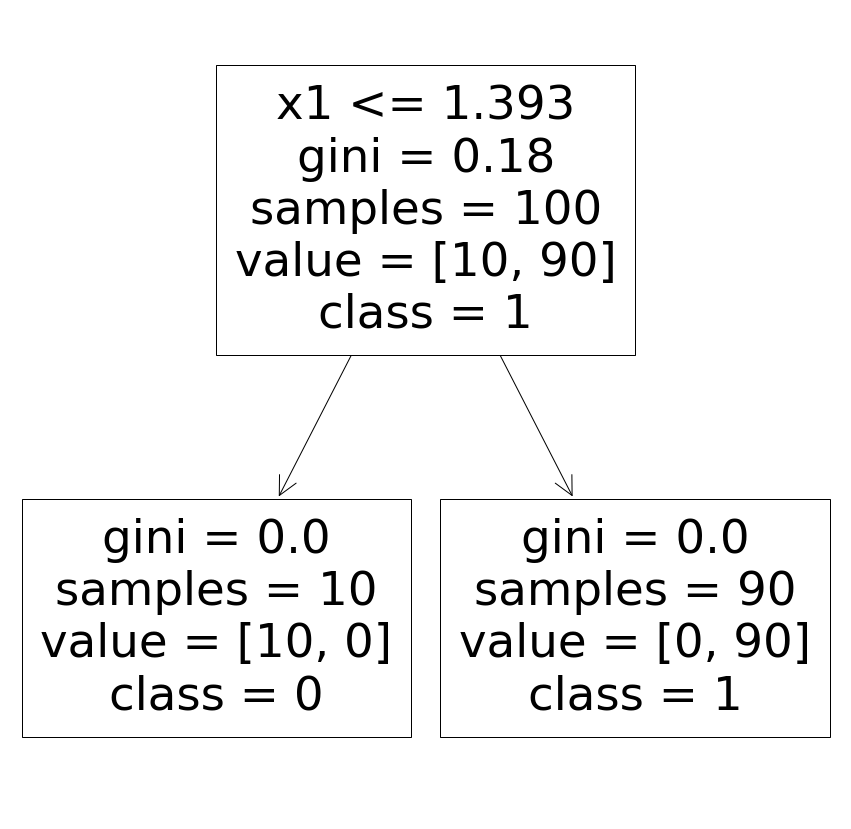

Regle utilisé pour classer l'exemple dans la classe 0:

noeud  0 : (X_test[0, 0] = 1.7449967634725922) > 1.3929892778396606)

 generation des regles contrefactuel
 
cas pour la feuille numero  1
 noeud  0 : (X_test[0, 0] = 0.610839303169417) <= 1.3929892778396606)
 noeud  1 : (X_test[0, -2] = 0.610839303169417) > -2.0)

 indice = 181
point =  [ 0.92834756 -0.23688326]
classe = 1


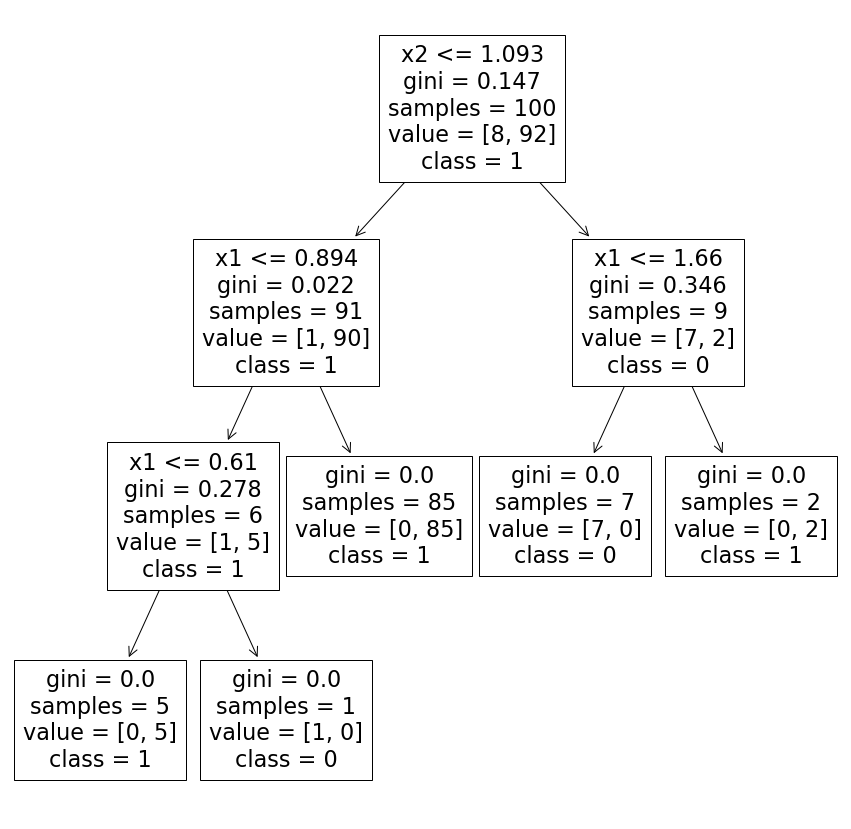

Regle utilisé pour classer l'exemple dans la classe 0:

noeud  0 : (X_test[0, 1] = -0.236883257701338) <= 1.0930437445640564)
noeud  1 : (X_test[0, 0] = 0.9283475555824543) > 0.8943528234958649)

 generation des regles contrefactuel
 
cas pour la feuille numero  4
 noeud  0 : (X_test[0, 1] = -0.7772070693736193) <= 1.0930437445640564)
 noeud  1 : (X_test[0, 0] = 0.610839303169417) <= 0.8943528234958649)
 noeud  2 : (X_test[0, 0] = 0.610839303169417) > 0.6101709604263306)
 noeud  3 : (X_test[0, -2] = 0.610839303169417) > -2.0)
 
cas pour la feuille numero  7
 noeud  0 : (X_test[0, 1] = -0.7772070693736193) <= 1.0930437445640564)
 noeud  1 : (X_test[0, 0] = 0.610839303169417) <= 1.6598100066184998)
 noeud  2 : (X_test[0, -2] = 0.610839303169417) > -2.0)

 indice = 193
point =  [ 1.97246277 -0.00440001]
classe = 1


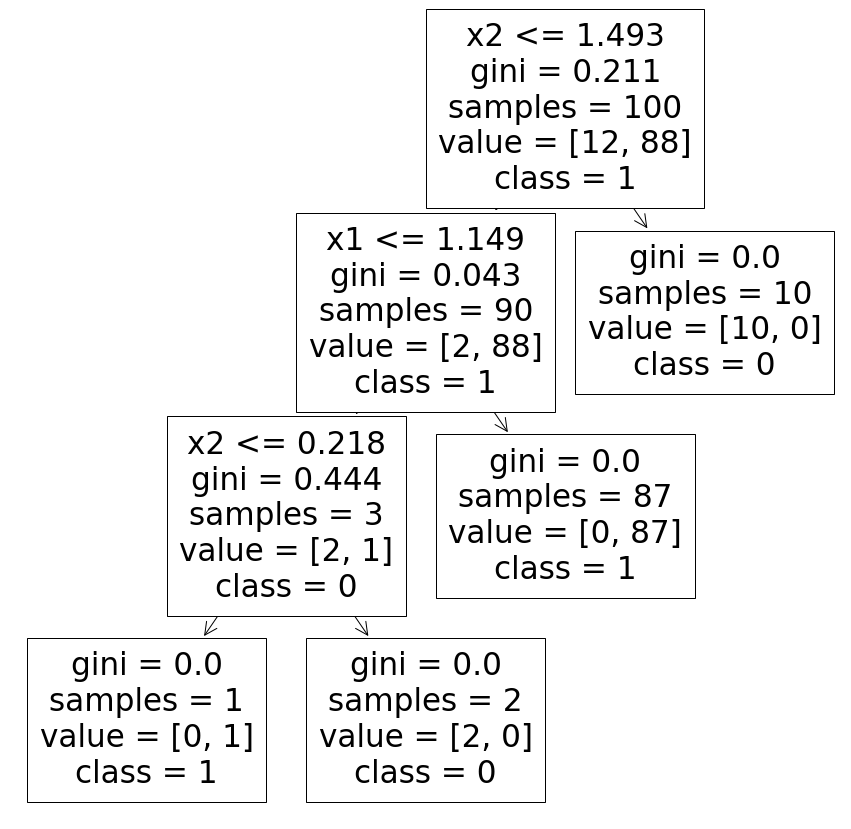

Regle utilisé pour classer l'exemple dans la classe 0:

noeud  0 : (X_test[0, 1] = -0.004400014050790123) <= 1.49269700050354)
noeud  1 : (X_test[0, 0] = 1.972462774811777) > 1.1486272811889648)

 generation des regles contrefactuel
 
cas pour la feuille numero  4
 noeud  0 : (X_test[0, 1] = -0.7772070693736193) <= 1.49269700050354)
 noeud  1 : (X_test[0, 0] = 0.610839303169417) <= 1.1486272811889648)
 noeud  2 : (X_test[0, 1] = -0.7772070693736193) <= 0.2183686215430498)
 noeud  3 : (X_test[0, -2] = 0.610839303169417) > -2.0)
 
cas pour la feuille numero  6
 noeud  0 : (X_test[0, 1] = -0.7772070693736193) <= 1.49269700050354)
 noeud  1 : (X_test[0, -2] = 0.610839303169417) > -2.0)

 indice = 202
point =  [0.02313286 0.18934089]
classe = 1


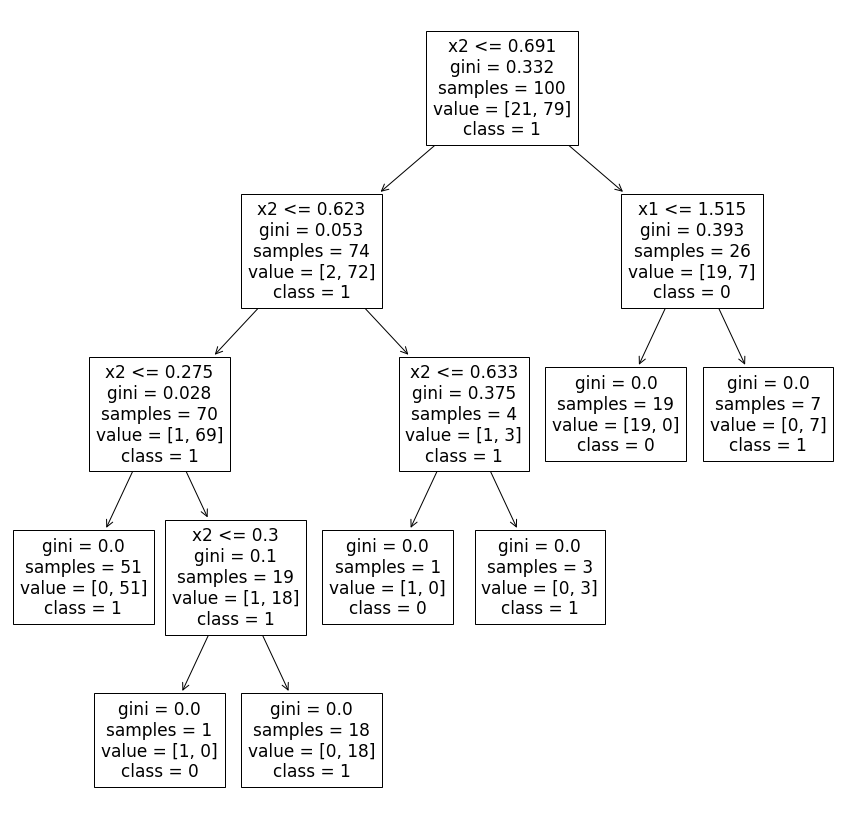

Regle utilisé pour classer l'exemple dans la classe 0:

noeud  0 : (X_test[0, 1] = 0.18934089337094226) <= 0.6910517513751984)
noeud  1 : (X_test[0, 1] = 0.18934089337094226) <= 0.6230830252170563)
noeud  2 : (X_test[0, 1] = 0.18934089337094226) <= 0.2753375619649887)

 generation des regles contrefactuel
 
cas pour la feuille numero  5
 noeud  0 : (X_test[0, 1] = -0.7772070693736193) <= 0.6910517513751984)
 noeud  1 : (X_test[0, 1] = -0.7772070693736193) <= 0.6230830252170563)
 noeud  2 : (X_test[0, 1] = -0.7772070693736193) <= 0.2753375619649887)
 noeud  3 : (X_test[0, 1] = -0.7772070693736193) <= 0.29963505268096924)
 noeud  4 : (X_test[0, -2] = 0.610839303169417) > -2.0)
 
cas pour la feuille numero  8
 noeud  0 : (X_test[0, 1] = -0.7772070693736193) <= 0.6910517513751984)
 noeud  1 : (X_test[0, 1] = -0.7772070693736193) <= 0.6230830252170563)
 noeud  2 : (X_test[0, 1] = -0.7772070693736193) <= 0.6326566934585571)
 noeud  3 : (X_test[0, -2] = 0.610839303169417) > -2.0)
 
cas pour l

In [20]:

for x in range(4):
    indice=random.randint(0, len(X_test))
    print("\n indice =",indice)
    print( "point = ",X_test[indice])
    print("classe =", y_test[indice])
    arbre=LORE(X_test[indice],RF.predict([X_test[indice]]),RF,0.5,0.5,0,2,X_test)
    analysetree(arbre,X_test[indice].reshape(1,-1),["x1","x2"])
    parcourirarbre(arbre,RF.predict([X_test[indice]]))


    


# Test sur des donnees reel 

Comme je le disais plus haut. Dans certain cas, je n'arrive pas à generer de point de la classe opposé. L'augmentation du N et du G qui represente le nombre de tour et la pop finale à avoir diminue le nombre de cas mais augmente grandement le temps d'execution

In [22]:
from sklearn import datasets
from sklearn.model_selection import train_test_split



In [23]:
datawine = load_wine(as_frame=True)
features=datawine.feature_names

newy=datawine["target"]
newx=datawine["data"]
for i in range(len(datawine["target"])):
    if datawine["target"][i]==2:
        newy=newy.drop(i)
        newx=newx.drop(i)

X_train, X_test, y_train, y_test =train_test_split(newx, newy, test_size=0.25, random_state=1)
#Xmax,Xmin=moyenne_parametre(X_train)
#print(Xmax)
#print(Xmin)
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)
X_train=pd.DataFrame(X_train).to_numpy()
X_test=pd.DataFrame(X_test).to_numpy()
y_train=pd.DataFrame(y_train).to_numpy()
y_test=pd.DataFrame(y_test).to_numpy()



In [24]:
a, RF=Randomforest(X_train, y_train,X_test, y_test)



/var/folders/xz/vzw73_1x4qd8h6_bhryn95mh0000gn/T/ipykernel_2259/765618365.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainx, trainy)



indice = 22
point =  [1.383e+01 1.650e+00 2.600e+00 1.720e+01 9.400e+01 2.450e+00 2.990e+00
 2.200e-01 2.290e+00 5.600e+00 1.240e+00 3.370e+00 1.265e+03]
classe = [0]


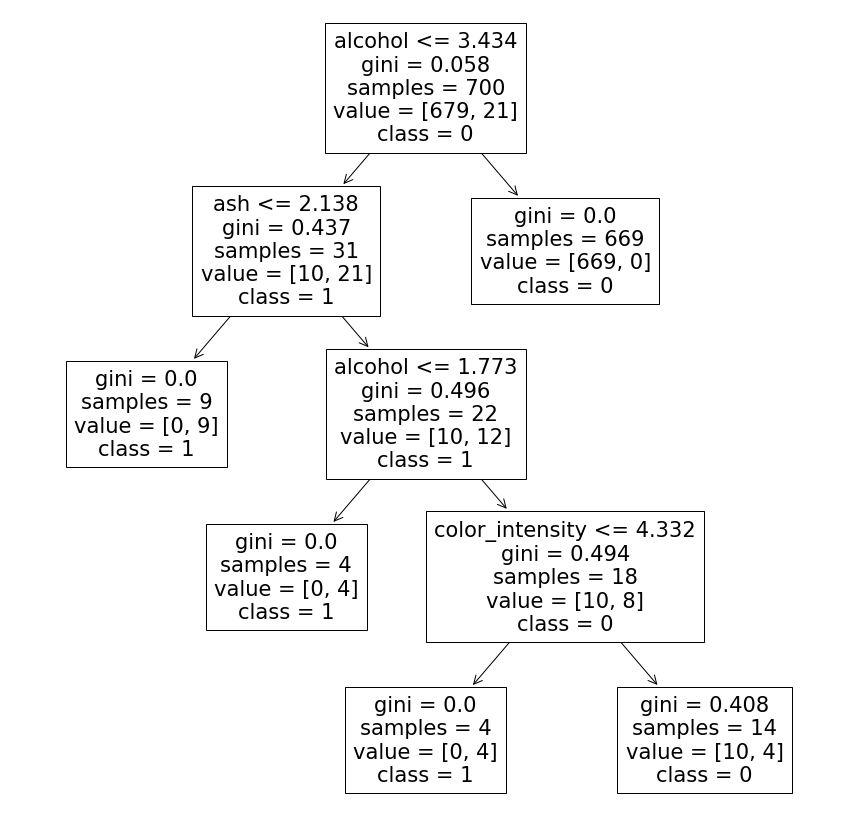

Regle utilisé pour classer l'exemple dans la classe 0:

noeud  0 : (X_test[0, 0] = 13.83) > 3.4340723752975464)

 generation des regles contrefactuel
 
cas pour la feuille numero  2
 noeud  0 : (X_test[1, 0] = 12.42) > 3.4340723752975464)
 noeud  1 : (X_test[1, 2] = 2.27) > 2.137704074382782)
 noeud  2 : (X_test[1, -2] = 3.3) > -2.0)
 
cas pour la feuille numero  4
 noeud  0 : (X_test[1, 0] = 12.42) > 3.4340723752975464)
 noeud  1 : (X_test[1, 2] = 2.27) > 2.137704074382782)
 noeud  2 : (X_test[1, 0] = 12.42) > 1.7731907367706299)
 noeud  3 : (X_test[1, -2] = 3.3) > -2.0)
 
cas pour la feuille numero  6
 noeud  0 : (X_test[1, 0] = 12.42) > 3.4340723752975464)
 noeud  1 : (X_test[1, 2] = 2.27) > 2.137704074382782)
 noeud  2 : (X_test[1, 0] = 12.42) > 1.7731907367706299)
 noeud  3 : (X_test[1, 9] = 2.7) <= 4.332442283630371)
 noeud  4 : (X_test[1, -2] = 3.3) > -2.0)

indice = 4
point =  [1.377e+01 1.900e+00 2.680e+00 1.710e+01 1.150e+02 3.000e+00 2.790e+00
 3.900e-01 1.680e+00 6.300e+00 

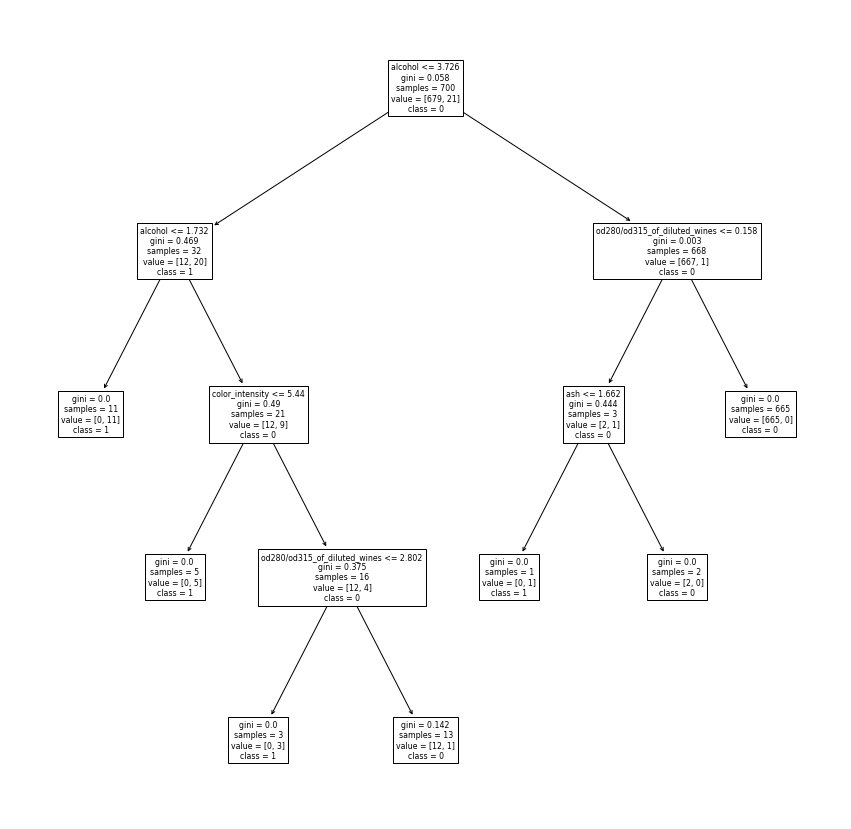

Regle utilisé pour classer l'exemple dans la classe 0:

noeud  0 : (X_test[0, 0] = 13.77) > 3.7262789011001587)
noeud  8 : (X_test[0, 11] = 2.93) > 0.1577656865119934)

 generation des regles contrefactuel
 
cas pour la feuille numero  2
 noeud  0 : (X_test[1, 0] = 12.42) > 3.7262789011001587)
 noeud  1 : (X_test[1, 0] = 12.42) > 1.7324722409248352)
 noeud  2 : (X_test[1, -2] = 3.3) > -2.0)
 
cas pour la feuille numero  4
 noeud  0 : (X_test[1, 0] = 12.42) > 3.7262789011001587)
 noeud  1 : (X_test[1, 0] = 12.42) > 1.7324722409248352)
 noeud  2 : (X_test[1, 9] = 2.7) <= 5.439772605895996)
 noeud  3 : (X_test[1, -2] = 3.3) > -2.0)
 
cas pour la feuille numero  6
 noeud  0 : (X_test[1, 0] = 12.42) > 3.7262789011001587)
 noeud  1 : (X_test[1, 0] = 12.42) > 1.7324722409248352)
 noeud  2 : (X_test[1, 9] = 2.7) <= 5.439772605895996)
 noeud  3 : (X_test[1, 11] = 3.3) > 2.802460193634033)
 noeud  4 : (X_test[1, -2] = 3.3) > -2.0)
 
cas pour la feuille numero  10
 noeud  0 : (X_test[1, 0] = 12.4

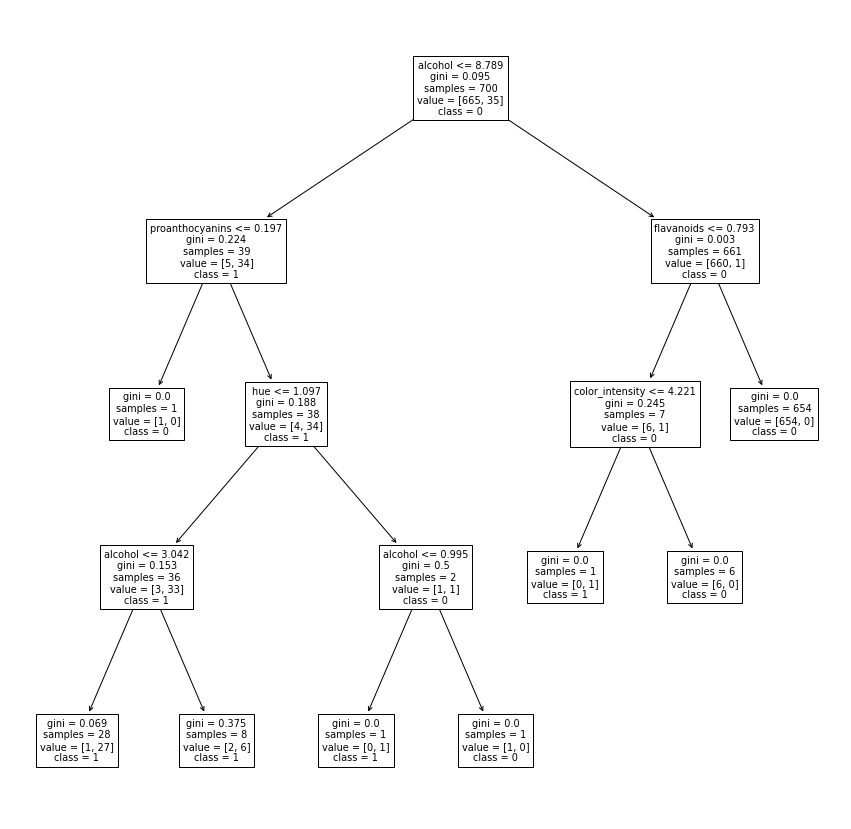

Regle utilisé pour classer l'exemple dans la classe 0:

noeud  0 : (X_test[0, 0] = 13.72) > 8.78865933418274)
noeud  10 : (X_test[0, 6] = 3.67) > 0.793218731880188)

 generation des regles contrefactuel
 
cas pour la feuille numero  5
 noeud  0 : (X_test[1, 0] = 12.42) > 8.78865933418274)
 noeud  1 : (X_test[1, 8] = 1.42) > 0.19689703732728958)
 noeud  2 : (X_test[1, 10] = 0.86) <= 1.096927285194397)
 noeud  3 : (X_test[1, 0] = 12.42) > 3.041785478591919)
 noeud  4 : (X_test[1, -2] = 3.3) > -2.0)
 
cas pour la feuille numero  6
 noeud  0 : (X_test[1, 0] = 12.42) > 8.78865933418274)
 noeud  1 : (X_test[1, 8] = 1.42) > 0.19689703732728958)
 noeud  2 : (X_test[1, 10] = 0.86) <= 1.096927285194397)
 noeud  3 : (X_test[1, 0] = 12.42) > 3.041785478591919)
 noeud  4 : (X_test[1, -2] = 3.3) > -2.0)
 
cas pour la feuille numero  8
 noeud  0 : (X_test[1, 0] = 12.42) > 8.78865933418274)
 noeud  1 : (X_test[1, 8] = 1.42) > 0.19689703732728958)
 noeud  2 : (X_test[1, 10] = 0.86) <= 1.096927285194397

In [31]:

for x in range(4):
    indice=random.randint(0, len(X_test)-1)
    print("\nindice =",indice)
    print( "point = ",X_test[indice])
    print("classe =", y_test[indice])
    arbre=LORE(X_test[indice],RF.predict([X_test[indice]]),RF,0.9,0.9,0,13,X_test,N=700,G=20)
    if arbre!=1 :
        analysetree(arbre,X_test[indice].reshape(1,-1),features)
        parcourirarbre(arbre,RF.predict([X_test[indice]]))
    